In [10]:
from typing import TypedDict

class PortFolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [3]:
def calc_total(state: PortFolioState) -> PortFolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortFolioState) -> PortFolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

In [7]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortFolioState)

builder.add_node("calc_total",calc_total)
builder.add_node("convert_to_inr",convert_to_inr)

builder.add_edge(START, "calc_total")
builder.add_edge("calc_total", "convert_to_inr")
builder.add_edge("convert_to_inr", END)

graph = builder.compile()

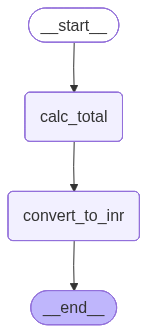

In [8]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}